In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold
import scipy.stats as stat
import pylab
import xgboost as xgb
from sklearn.preprocessing import PolynomialFeatures

In [2]:
X = pd.read_csv("Train_XAS1.csv",usecols=['temp','sal','mld','chla','dic','no3'])
y = pd.read_csv("Train_yAS1.csv",usecols=['misfit'])
X_test = pd.read_csv("Test_XAS1.csv",usecols=['temp','sal','mld','chla','dic','no3'])
y_test = pd.read_csv("Test_yAS1.csv",usecols=['misfit'])

X['chla'] =np.log(X['chla'])
X['mld'] =np.log(X['mld'])
X['no3'] =np.log(X['no3'])

X_test['chla'] =np.log(X_test['chla'])
X_test['mld'] =np.log(X_test['mld'])
X_test['no3'] =np.log(X_test['no3'])

In [40]:
# sc = StandardScaler()
# X = sc.fit_transform(X)
# X_test = sc.transform(X_test)

In [4]:
kfold = KFold(n_splits=10)

In [14]:
params={'lambda': 0.8833875092358041,
 'alpha': 0.6074122882841282,
 'subsample': 0.7153243568613212,
 'colsample_bytree': 0.8336394047667379,
 'max_depth': 17,
 'min_child_weight': 6,
 'learning_rate': 0.10849075363388405,
 'gamma': 0.44593044004494464,
 'n_estimators': 300,'random_state':0}

In [15]:
for train_ix, val_ix in kfold.split(X):
    X_train, X_val = X.iloc[train_ix], X.iloc[val_ix]
    y_train, y_val = y.iloc[train_ix], y.iloc[val_ix]
    # model = xgb.XGBRegressor()
    model = xgb.XGBRegressor(**params)
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val,y_val)])

[0]	validation_0-rmse:16.68007	validation_1-rmse:16.79435
[1]	validation_0-rmse:14.96487	validation_1-rmse:15.07334
[2]	validation_0-rmse:13.43337	validation_1-rmse:13.54196
[3]	validation_0-rmse:12.07413	validation_1-rmse:12.18223
[4]	validation_0-rmse:10.86461	validation_1-rmse:10.97447
[5]	validation_0-rmse:9.78617	validation_1-rmse:9.89884
[6]	validation_0-rmse:8.82641	validation_1-rmse:8.94164
[7]	validation_0-rmse:7.97787	validation_1-rmse:8.09218
[8]	validation_0-rmse:7.22404	validation_1-rmse:7.33685
[9]	validation_0-rmse:6.55362	validation_1-rmse:6.66878
[10]	validation_0-rmse:5.96312	validation_1-rmse:6.07701
[11]	validation_0-rmse:5.44082	validation_1-rmse:5.55687
[12]	validation_0-rmse:4.98204	validation_1-rmse:5.10457
[13]	validation_0-rmse:4.57404	validation_1-rmse:4.70371
[14]	validation_0-rmse:4.21664	validation_1-rmse:4.35208
[15]	validation_0-rmse:3.90726	validation_1-rmse:4.04747
[16]	validation_0-rmse:3.63759	validation_1-rmse:3.78244
[17]	validation_0-rmse:3.40640	

In [17]:
y_pred = model.predict(X_test)
r21 = r2_score(y_test,y_pred)
print(r21)
rmse = mean_squared_error(y_test,y_pred,squared=False)
print(rmse)

0.9856542944908142
2.2350904186914278


/home/kunal/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [18]:
y_pred_train = model.predict(X_train)
r2_tr = r2_score(y_train,y_pred_train)
print(r2_tr)
rmse_tr = mean_squared_error(y_train,y_pred_train,squared=False)
print(rmse_tr)

0.9905522465705872
1.8110197561049155


/home/kunal/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Text(0.5, 1.0, 'XGBoost')

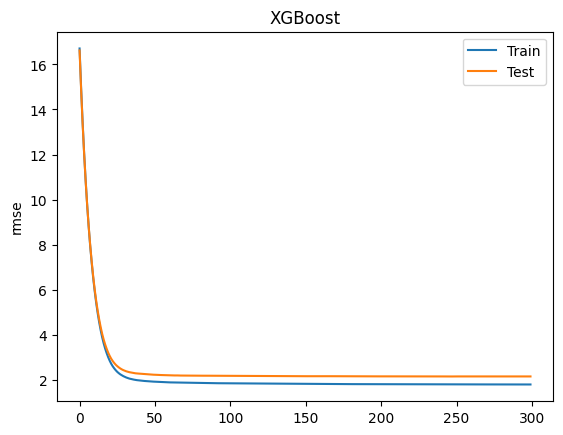

In [19]:
results = model.evals_result()
fig, ax = plt.subplots()
ax.plot( results['validation_0']['rmse'], label='Train')
ax.plot( results['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('rmse')
plt.title('XGBoost')

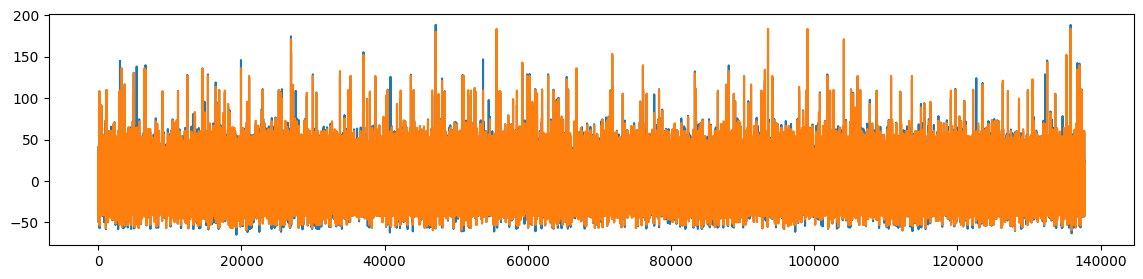

In [20]:
# plt.plot(y_test)
fig,ax=plt.subplots(figsize=(14,3))
plt.plot(y_train)
plt.plot(y_pred_train)

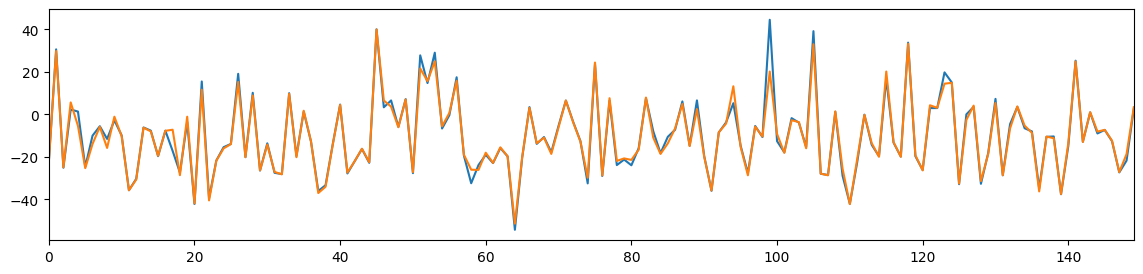

In [21]:
fig,ax=plt.subplots(figsize=(14,3))
ax=ax.margins(x=0)
plt.plot(y_test[0:150])
plt.plot(y_pred[0:150])

In [22]:
from joblib import dump
dump(model,'xgb_SD.joblib_AS_new.dat')

['xgb_SD.joblib_AS_new.dat']